#### Nama : Muhammad Ridho Pratama

#### NIM : 1306620013

#### Kelas : Fisika A 2020



### **Tugas 7 PCD (Convolution Image)**

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import time
from scipy import signal
from skimage.io import imread
import matplotlib.pylab as pylab 
import timeit

#### **1. Buktikan bahwa konvolusi sama dengan korelasi yang kernelnya diputar $180^{\circ}$**

Text(0.5, 1.0, 'Original Image')

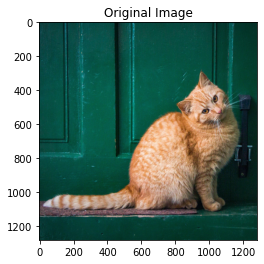

In [11]:
img = cv2.imread('cat.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_array = np.array(img, dtype=float)/255

plt.imshow(img)
plt.title('Original Image')

In [12]:
prewitt_kernel=([[9,9,-7,-7,-7],[9,5,-3,-3,-7],[9,5,0,-3,-7], [9,5,-3,-3,-7], [9,9,-7,-7,-7]])

rgb_kernel = np.ones((5, 5, 3))
rgb_kernel[:, :, 0] = prewitt_kernel
rgb_kernel[:, :, 1] = prewitt_kernel
rgb_kernel[:, :, 2] = prewitt_kernel

#### Convolution With Sobel Kernel

In [13]:
img_con = ndimage.convolve(img_array, rgb_kernel)

#### Correlation With Sobel Kernel

In [14]:
img_cor  = ndimage.correlate(img_array, rgb_kernel)

#### Correlation With Rotated Sobel Kernel $180^{\circ}$

In [15]:
prewitt_kernel_rot = np.flip(np.flip(prewitt_kernel,1),0)
rgb_kernel[:, :, 0] = prewitt_kernel_rot
rgb_kernel[:, :, 1] = prewitt_kernel_rot
rgb_kernel[:, :, 2] = prewitt_kernel_rot

In [16]:
img_cor_rot  = ndimage.correlate(img_array, rgb_kernel)

#### Output Image with Different from each other

In [17]:
diff_1 = img_con - img_cor
diff_2 = img_con - img_cor_rot

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, "Different of convolution - correlation' ")

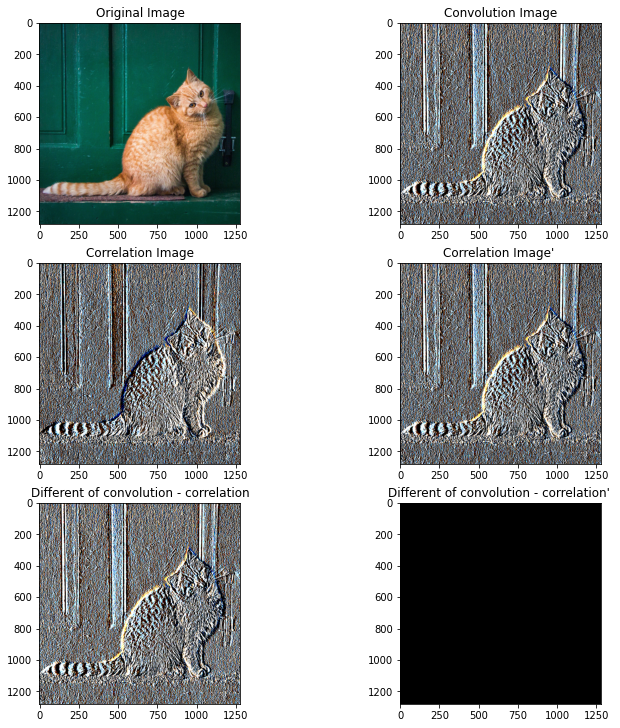

In [18]:
fig = plt.figure(figsize=(10, 10), constrained_layout=True)
spec = fig.add_gridspec(ncols = 2, nrows =3, figure = fig)

ax1 = fig.add_subplot(spec[0,0])
ax1.imshow(img)
ax1.set_title('Original Image')

ax2 = fig.add_subplot(spec[0,1])
ax2.imshow(img_con)
ax2.set_title("Convolution Image")

ax3 = fig.add_subplot(spec[1,0])
ax3.imshow(img_cor)
ax3.set_title("Correlation Image")

ax4 = fig.add_subplot(spec[1,1])
ax4.imshow(img_cor_rot)
ax4.set_title("Correlation Image' ")

ax5 = fig.add_subplot(spec[2,0])
ax5.imshow(diff_1)
ax5.set_title("Different of convolution - correlation")

ax6 = fig.add_subplot(spec[2,1])
ax6.imshow(diff_2)
ax6.set_title("Different of convolution - correlation' ")

Dari gambar diatas terbukti bahwa konvolusi adalah korelasi dengan kernel yang diputar $180^{\circ}$, dapat dilihat dari perbedaan antara hasil gambar konvolusi dengan korelasi' (pada gambar ke-6) yakni bernilai 0 sehingga menghasilkan warna hitam.

### **2. Buat script perhitungan konvolusi secara langsung dan konvolusi dengan transformasi Fourier. Hitung waktu running untuk masing-masing proses konvolusi**

#### Scipy Convole() with Gaussian blur kernels

C:\Users\Muhammad Ridho P\AppData\Local\Temp\ipykernel_6668\1801645943.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


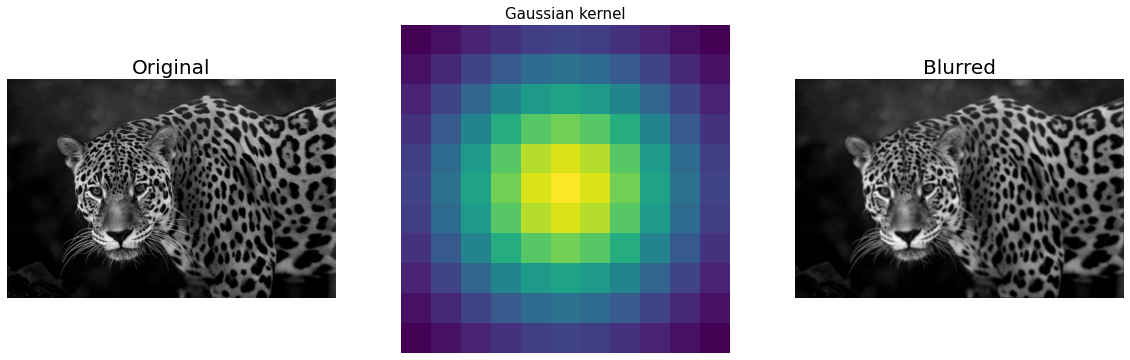

In [19]:
im = np.mean(imread('Macan.jpeg'), axis=2)
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) 
im_blurred1 = signal.convolve(im, gauss_kernel, mode='same')
fig, (ax_original, ax_kernel, ax_blurred) = pylab.subplots(1, 3,figsize=(20,8))
ax_original.imshow(im, cmap='gray')
ax_original.set_title('Original', size=20)
ax_original.set_axis_off()
ax_kernel.imshow(gauss_kernel, cmap='viridis')
ax_kernel.set_title('Gaussian kernel', size=15)
ax_kernel.set_axis_off()
ax_blurred.imshow(im_blurred1, cmap='gray')
ax_blurred.set_title('Blurred', size=20)
ax_blurred.set_axis_off()
fig.show()

#### Scipy FFTConvole() with Gaussian blur kernels

(1066, 1599)


C:\Users\Muhammad Ridho P\AppData\Local\Temp\ipykernel_6668\1977489382.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


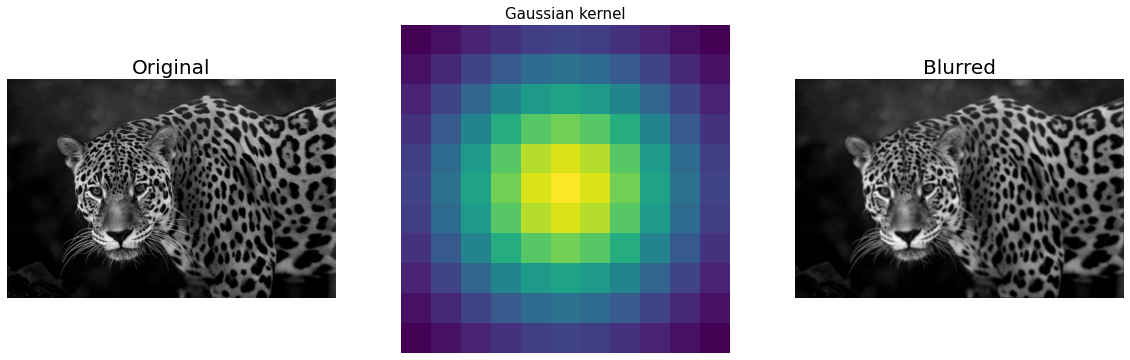

In [20]:
im = np.mean(imread('Macan.jpeg'), axis=2)
print(im.shape)
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) 
im_blurred2 = signal.fftconvolve(im, gauss_kernel, mode='same')
fig, (ax_original, ax_kernel, ax_blurred) = pylab.subplots(1, 3,
figsize=(20,8))
ax_original.imshow(im, cmap='gray')
ax_original.set_title('Original', size=20)
ax_original.set_axis_off()
ax_kernel.imshow(gauss_kernel, cmap='viridis')
ax_kernel.set_title('Gaussian kernel', size=15)
ax_kernel.set_axis_off()
ax_blurred.imshow(im_blurred2, cmap='gray')
ax_blurred.set_title('Blurred', size=20)
ax_blurred.set_axis_off()
fig.show()


(<AxesSubplot:title={'center':'ffconvolve Output'}>,
 Text(0.5, 1.0, 'ffconvolve Output'),
 (-0.5, 1598.5, 1065.5, -0.5))

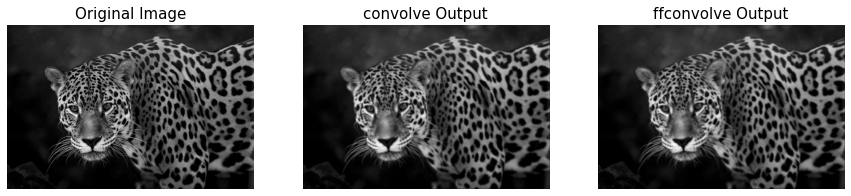

In [21]:
pylab.figure(figsize=(15,5))
pylab.gray()
pylab.subplot(131), pylab.imshow(im), pylab.title('Original Image',size=15), pylab.axis('off')
pylab.subplot(132), pylab.imshow(im_blurred1), pylab.title('convolve Output', size=15), pylab.axis('off')
pylab.subplot(133), pylab.imshow(im_blurred2), pylab.title('ffconvolve Output', size=15),pylab.axis('off')

#### Comparing the runtimes Convole and Convole FFT with Scipy and Gaussian blur kernel

In [25]:
im = np.mean(imread('cat.jpeg'), axis=2)
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) 
im_blurred1 = signal.convolve(im, gauss_kernel, mode="same")
im_blurred2 = signal.fftconvolve(im, gauss_kernel, mode='same')
def wrapper_convolve(func):
    def wrapped_convolve():
        return func(im, gauss_kernel, mode="same")
    return wrapped_convolve
wrapped_convolve = wrapper_convolve(signal.convolve)
wrapped_fftconvolve = wrapper_convolve(signal.fftconvolve)

times1 = timeit.repeat(wrapped_convolve, number=1, repeat=100)
times2 = timeit.repeat(wrapped_fftconvolve, number=1, repeat=100)

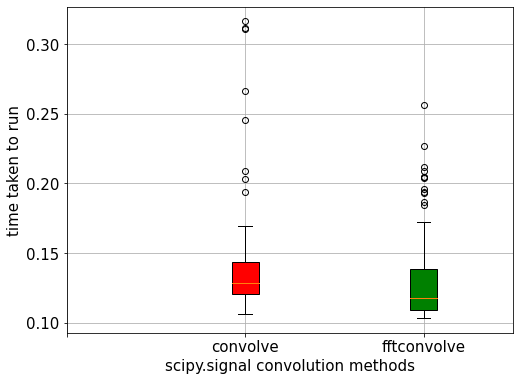

In [27]:
data = [times1, times2]
pylab.figure(figsize=(8,6))
box = pylab.boxplot(data, patch_artist=True) #notch=True,
colors = ['red', 'green']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
pylab.xticks(np.arange(3), ('', 'convolve', 'fftconvolve'), size=15)
pylab.yticks(fontsize=15)
pylab.grid()
pylab.xlabel('scipy.signal convolution methods', size=15)
pylab.ylabel('time taken to run', size = 15)
pylab.show()

Dari gambar diatas diketahui bahwa waktu yang diperlukan untuk merunning konvolusi secara langsung akan lebih lama dibandingkan konvolusi dengan FFT terlebih dahulu. 